In [1]:
import pickle
import numpy as np
pickle.format_version
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
a = open('./dataset/s01.dat', 'rb')
b = pickle.load(a, encoding='latin1')

In [3]:
b.keys()
data = b['data']
labels = b['labels']
data.shape, labels.shape

((40, 40, 8064), (40, 4))

<!-- 0. timestamp -->
1.	Fp1
2.	AF3
3.	F3
4.	F7
5.	FC5
6.	FC1
7.	C3
8.	T7
9.	CP5
10.	CP1
11.	P3
12.	P7
13.	PO3
14.	O1
15.	Oz
16.	Pz
17.	Fp2
18.	AF4
19.	Fz
20.	F4
21.	F8
22.	FC6
23.	FC2
24.	Cz
25.	C4
26.	T8
27.	CP6
28.	CP2
29.	P4
30.	P8
31.	PO4
32.	O2
<!-- 33. markers -->

- The data was downsampled to 128Hz.
- EOG artefacts were removed as in [1].
- A bandpass frequency filter from 4.0-45.0Hz was applied.
- The data was averaged to the common reference.
- The EEG channels were reordered so that they all follow the Geneva order as above.
- The data was segmented into 60 second trials and a 3 second pre-trial baseline removed.
- The trials were reordered from presentation order to video (Experiment_id) order.

In [4]:
import mne
mne.sys_info()

Platform:         Linux-5.4.0-132-generic-x86_64-with-glibc2.27
Python:           3.9.12 (main, Apr  5 2022, 06:56:58)  [GCC 7.5.0]
Executable:       /home/anjana/anaconda3/bin/python
CPU:              x86_64: 12 cores
Memory:           15.5 GB

mne:              1.2.2
numpy:            1.21.5 {MKL 2021.4-Product with 6 threads}
scipy:            1.7.3
matplotlib:       3.5.1 {backend=module://matplotlib_inline.backend_inline}

sklearn:          1.0.2
numba:            0.55.1
nibabel:          Not found
nilearn:          Not found
dipy:             Not found
openmeeg:         Not found
cupy:             Not found
pandas:           1.4.2
pyvista:          Not found
pyvistaqt:        Not found
ipyvtklink:       Not found
vtk:              Not found
qtpy:             2.0.1 {PyQt5=5.9.7}
ipympl:           Not found
pyqtgraph:        Not found
pooch:            v1.6.0

mne_bids:         Not found
mne_nirs:         Not found
mne_features:     0.2.1
mne_qt_browser:   Not found
mne_connectivit

In [7]:
temp = data[0,:32]
temp.shape

(32, 8064)

In [5]:
# MNE object: MNE.io.Raw 
# https://mne.tools/stable/most_used_classes.html
ch_names = ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8','PO4','O2']
ch_types = ['eeg'] * len(ch_names)
sampling_rate = 128 #Hz
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sampling_rate)
raw = mne.io.RawArray(data[0,:32], info)
raw.set_montage('standard_1020')
raw

Creating RawArray with float64 data, n_channels=32, n_times=8064
    Range : 0 ... 8063 =      0.000 ...    62.992 secs
Ready.


<RawArray | 32 x 8064 (63.0 s), ~2.0 MB, data loaded>

Effective window size : 2.000 (s)


/home/anjana/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


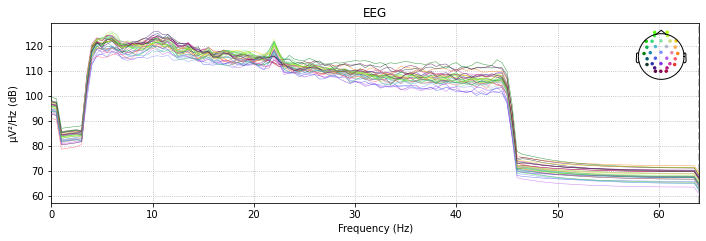

In [36]:
raw.compute_psd().plot()
#plt.show()

In [37]:
evoked = mne.EvokedArray(data[0,:32],info)
evoked.set_montage('standard_1020')

<Evoked | '' (average, N=1), 0 – 62.992 sec, baseline off, 32 ch, ~2.0 MB>

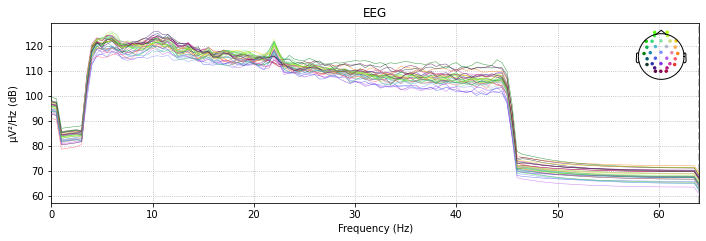

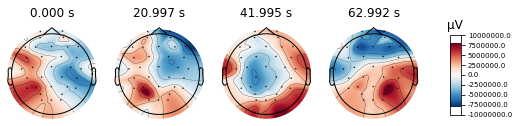

In [38]:
evoked.plot_topomap()
pass

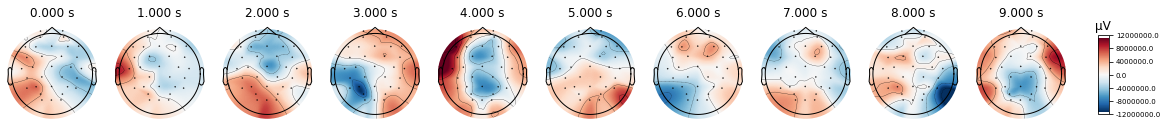

In [39]:
evoked.plot_topomap([0,1,2,3,4,5,6,7,8,9])
pass

In [40]:
# import matplotlib.pyplot as plt
# raw.compute_psd().plot()
# # plt.show()
# evoked.plot_psd()

In [41]:
a = evoked.compute_psd()
a._data.shape

    Using multitaper spectrum estimation with 7 DPSS windows


(32, 4033)

In [42]:
b = raw.compute_psd()
b._data.shape

Effective window size : 2.000 (s)


(32, 129)

Effective window size : 2.000 (s)


/home/anjana/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


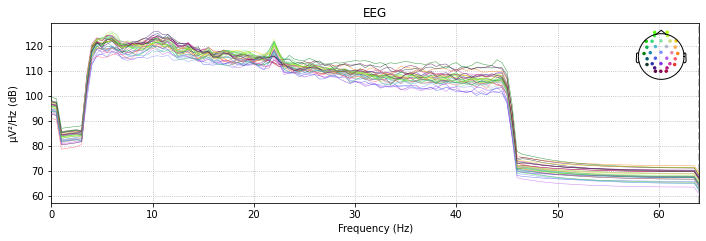

In [43]:
raw.compute_psd().plot()

Effective window size : 2.000 (s)


/home/anjana/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


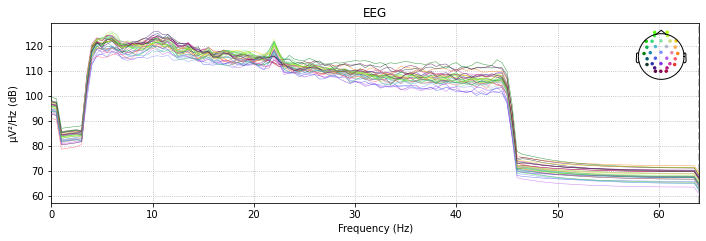

In [44]:
# raw.notch_filter(20, notch_widths=1)
raw.compute_psd().plot()

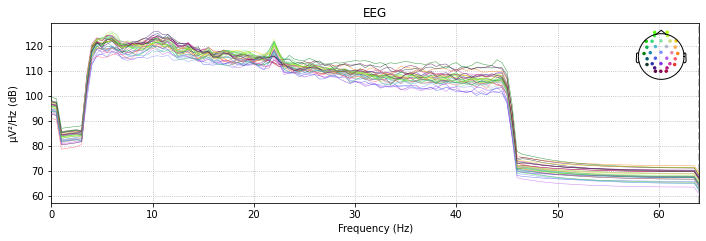

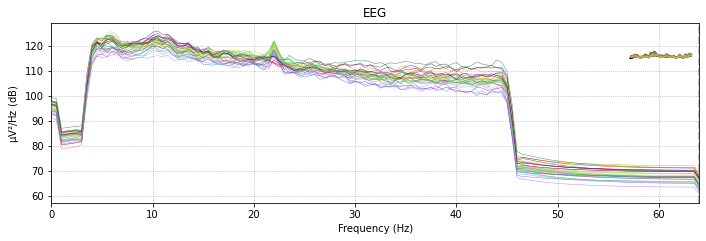

In [45]:
alphas = b._data[:, 16:25]
plt.plot(alphas)
plt.show()

In [46]:
# shape (n_epochs, n_channels, n_times)
# data.shape => 40,40,8068
# tmin(float): Start time before event. If nothing provided, defaults to 0.
# baseline(None | tuple of length 2): The time interval to consider as “baseline” when applying baseline correction. 
# If None, do not apply baseline correction. 
# If a tuple (a, b), the interval is between a and b (in seconds), 
#   including the endpoints. If a is None, the beginning of the data is used; and if b is None, 
#   it is set to the end of the interval. If (None, None), the entire time interval is used.
# 3 + 60
epochs = mne.EpochsArray(data[:,:32,:], info, tmin=0, baseline=(0,3))
epochs = mne.EpochsArray(epochs._data[:,:,128*3:], info)

Not setting metadata
40 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


In [47]:
epochs._data.shape

(40, 32, 7680)

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


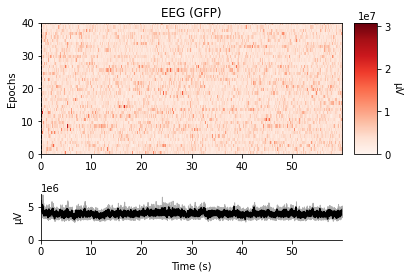

[<Figure size 432x288 with 3 Axes>]

In [48]:
epochs.plot_image()

In [49]:
#!pip install mne-features

In [8]:
5+5+19+16

45

In [50]:
from mne_features.feature_extraction import FeatureExtractor
#from mne_features.

In [51]:
# [alias_feature_function]__[optional_param]
bands = [(4,8), (8,12), (12,30), (30,45)]
params = dict({
    'pow_freq_bands__log':True,
    'pow_freq_bands__normalize':False,
    'pow_freq_bands__freq_bands':bands,
    # 'mean__[]': 1111,
})
fe = FeatureExtractor(sfreq=128, selected_funcs=['pow_freq_bands','mean','std'],params=params)
X = fe.fit_transform(X=data[:,:32,:])

In [52]:
X.shape

(40, 192)

In [54]:
#X[0,:]

In [56]:
data2 = data.copy()

In [57]:
#2 participants
dataset = [data, data2]
data_2_participants = np.concatenate(dataset,axis=0)
data_2_participants.shape

(80, 40, 8064)

In [59]:
fe_2_participants = FeatureExtractor(sfreq=128, selected_funcs=['pow_freq_bands'],params=params)
X_2_participants = fe_2_participants.fit_transform(X=data_2_participants[:,:32,:])
X_2_participants.shape

(80, 128)

In [157]:
X.shape

(80, 192)

In [ ]:
np.convolve

In [ ]:
a, v = array(a, copy=False, ndmin=1), array(v, copy=False, ndmin=1)
if (len(v) > len(a)):
    a, v = v, a
if len(a) == 0:
    raise ValueError('a cannot be empty')
if len(v) == 0:
    raise ValueError('v cannot be empty')
return multiarray.(a, correlatev[::-1], mode)

In [1]:
import numpy as np

In [3]:
np.convolve(a=np.array([1,2,3]), v=np.array([1,2,3]))

'hi'

In [61]:
#!pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas